#### Importação das bibliotecas necessárias

In [1]:
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objects as go
import numpy as np
import warnings

warnings.filterwarnings(action='ignore')

#### Leitura do Dataframe pós pré-processamento

In [2]:
df_athletes_activities = pd.read_csv('.../running_inactivity_prediction/df_athletes_activities.csv')
df_athletes_activities

,activity_date,athlete_id,total_distance (km),total_time (min),pace (min/km),speed (km/h),week_frequency,week_total_time,week_max_time,week_total_dist,...,PR_pace,PR_speed,PR_days_since_last_act,PR_week_frequency,PR_week_total_time,PR_week_max_time,PR_week_total_dist,PR_week_max_dist,PR_week_best_pace,PR_week_best_speed
0,2020-07-09,1,6.03,39.0,6.47,9.28,1,39.0,39.0,6.03,...,6.47,9.28,0,1,39.0,39.0,6.03,6.03,6.47,9.28
1,2020-07-12,1,7.57,55.0,7.27,8.26,2,94.0,55.0,13.60,...,6.47,9.28,3,2,94.0,55.0,13.60,7.57,6.47,9.28
2,2020-07-16,1,3.61,23.0,6.37,9.42,2,78.0,55.0,11.18,...,6.37,9.42,4,2,94.0,55.0,13.60,7.57,6.37,9.42
3,2020-07-24,1,5.84,41.0,7.02,8.55,1,41.0,41.0,5.84,...,6.37,9.42,8,2,94.0,55.0,13.60,7.57,6.37,9.42
4,2020-07-25,1,4.28,32.0,7.48,8.02,2,73.0,41.0,10.12,...,6.37,9.42,8,2,94.0,55.0,13.60,7.57,6.37,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,2024-06-16,7,10.06,45.0,4.47,13.26,3,95.0,45.0,18.83,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
740,2024-06-18,7,5.20,33.0,6.35,9.27,3,108.0,45.0,20.96,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
741,2024-06-21,7,12.10,62.0,5.12,11.71,3,140.0,62.0,27.36,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
742,2024-06-26,7,4.08,22.0,5.39,11.13,2,84.0,62.0,16.18,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77


In [3]:
df_athletes_activities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   activity_date           744 non-null    object 
 1   athlete_id              744 non-null    int64  
 2   total_distance (km)     744 non-null    float64
 3   total_time (min)        744 non-null    float64
 4   pace (min/km)           744 non-null    float64
 5   speed (km/h)            744 non-null    float64
 6   week_frequency          744 non-null    int64  
 7   week_total_time         744 non-null    float64
 8   week_max_time           744 non-null    float64
 9   week_total_dist         744 non-null    float64
 10  week_max_dist           744 non-null    float64
 11  week_best_pace          744 non-null    float64
 12  week_best_speed         744 non-null    float64
 13  days_since_last_act     744 non-null    int64  
 14  inactivation            744 non-null    in

#### Filtrando o Dataframe em um com apenas as features que irão para à modelagem para serem analisadas e exploradas

In [4]:
df_athletes_activities_features = df_athletes_activities.drop(['activity_date', 'athlete_id', 'inactivation'], axis = 1)
df_athletes_activities_features

,total_distance (km),total_time (min),pace (min/km),speed (km/h),week_frequency,week_total_time,week_max_time,week_total_dist,week_max_dist,week_best_pace,...,PR_pace,PR_speed,PR_days_since_last_act,PR_week_frequency,PR_week_total_time,PR_week_max_time,PR_week_total_dist,PR_week_max_dist,PR_week_best_pace,PR_week_best_speed
0,6.03,39.0,6.47,9.28,1,39.0,39.0,6.03,6.03,6.47,...,6.47,9.28,0,1,39.0,39.0,6.03,6.03,6.47,9.28
1,7.57,55.0,7.27,8.26,2,94.0,55.0,13.60,7.57,6.47,...,6.47,9.28,3,2,94.0,55.0,13.60,7.57,6.47,9.28
2,3.61,23.0,6.37,9.42,2,78.0,55.0,11.18,7.57,6.37,...,6.37,9.42,4,2,94.0,55.0,13.60,7.57,6.37,9.42
3,5.84,41.0,7.02,8.55,1,41.0,41.0,5.84,5.84,7.02,...,6.37,9.42,8,2,94.0,55.0,13.60,7.57,6.37,9.42
4,4.28,32.0,7.48,8.02,2,73.0,41.0,10.12,5.84,7.02,...,6.37,9.42,8,2,94.0,55.0,13.60,7.57,6.37,9.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
739,10.06,45.0,4.47,13.26,3,95.0,45.0,18.83,10.06,4.47,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
740,5.20,33.0,6.35,9.27,3,108.0,45.0,20.96,10.06,4.47,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
741,12.10,62.0,5.12,11.71,3,140.0,62.0,27.36,12.10,4.47,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77
742,4.08,22.0,5.39,11.13,2,84.0,62.0,16.18,12.10,5.12,...,4.36,13.77,5,5,190.0,70.0,35.81,13.24,4.36,13.77


#### Análise da distribuição das features por meio de Histogramas (Para ver se há Distribuição Normal)

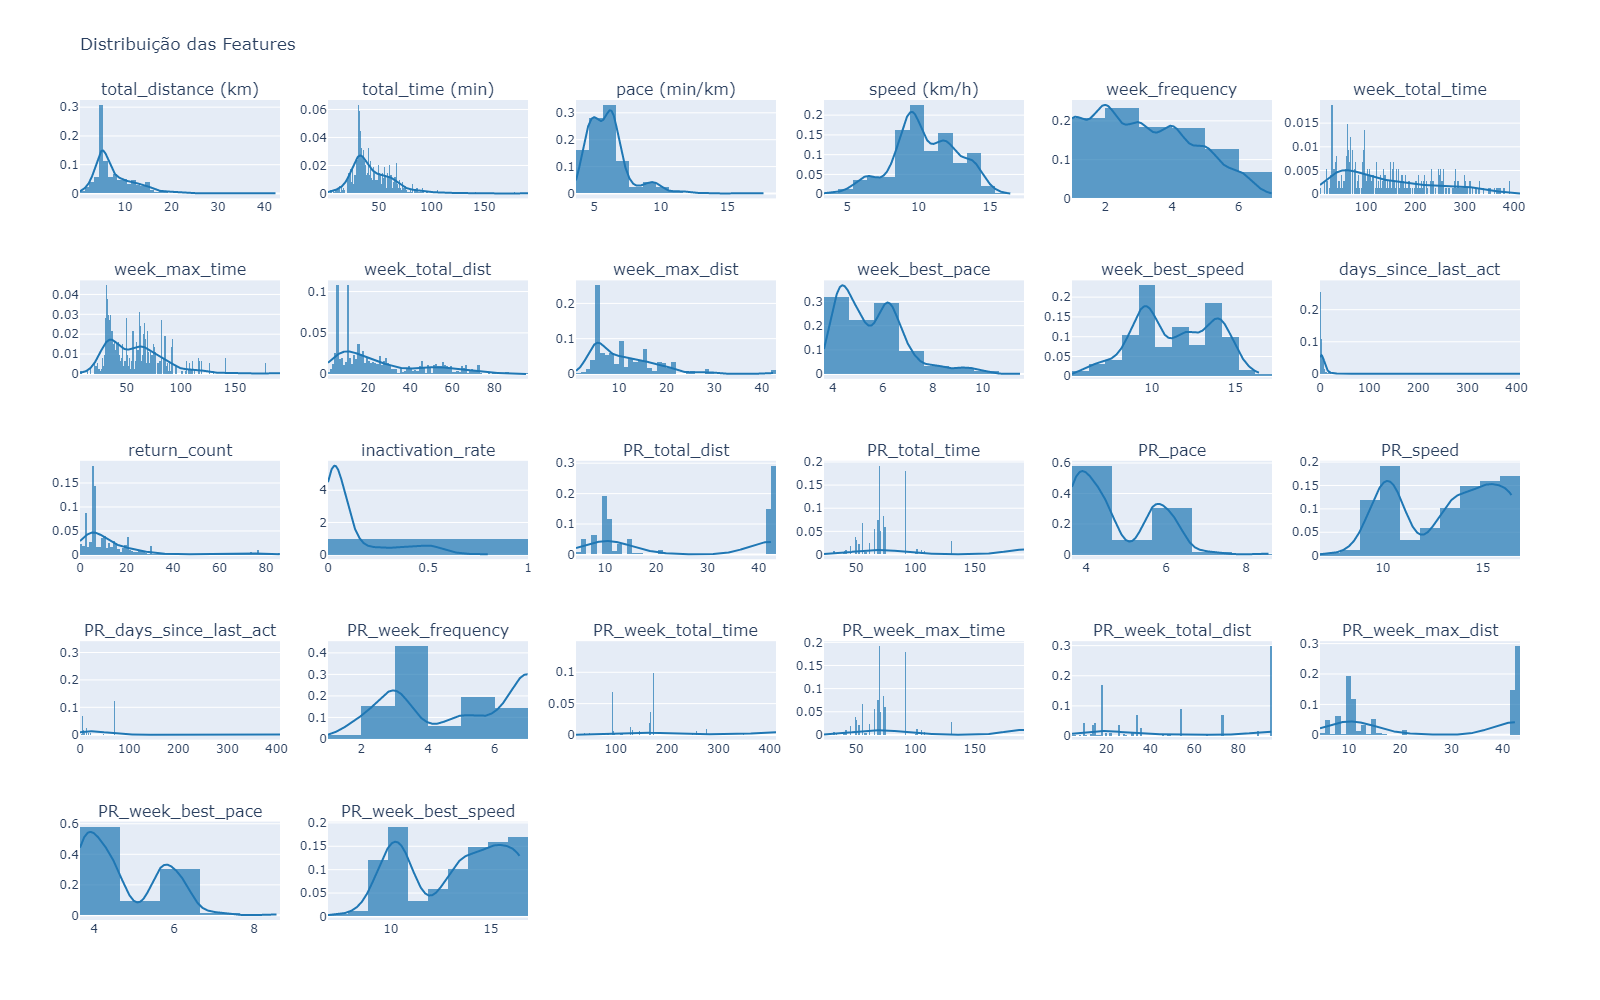

In [5]:
features = df_athletes_activities_features.columns

# Criando a figura com 6 colunas e 5 linhas
fig = sp.make_subplots(rows=5, cols=6, subplot_titles=features)

# Adicionando a distribuição de cada feature ao subplot correspondente
for i, feature in enumerate(features, start=1):
    row = (i - 1) // 6 + 1
    col = (i - 1) % 6 + 1
    
    # Criando o histograma com linha de densidade (KDE)
    hist = ff.create_distplot([df_athletes_activities_features[feature]], group_labels=[feature], show_hist=True, show_rug=False)
    
    for trace in hist['data']:
        fig.add_trace(trace, row=row, col=col)

# Ajustando o layout
fig.update_layout(height=1000, width=1600, title_text="Distribuição das Features", showlegend=False)

# Mostrando a figura
fig.show('png')


#### Análise da descrição estatística das features através de boxplots

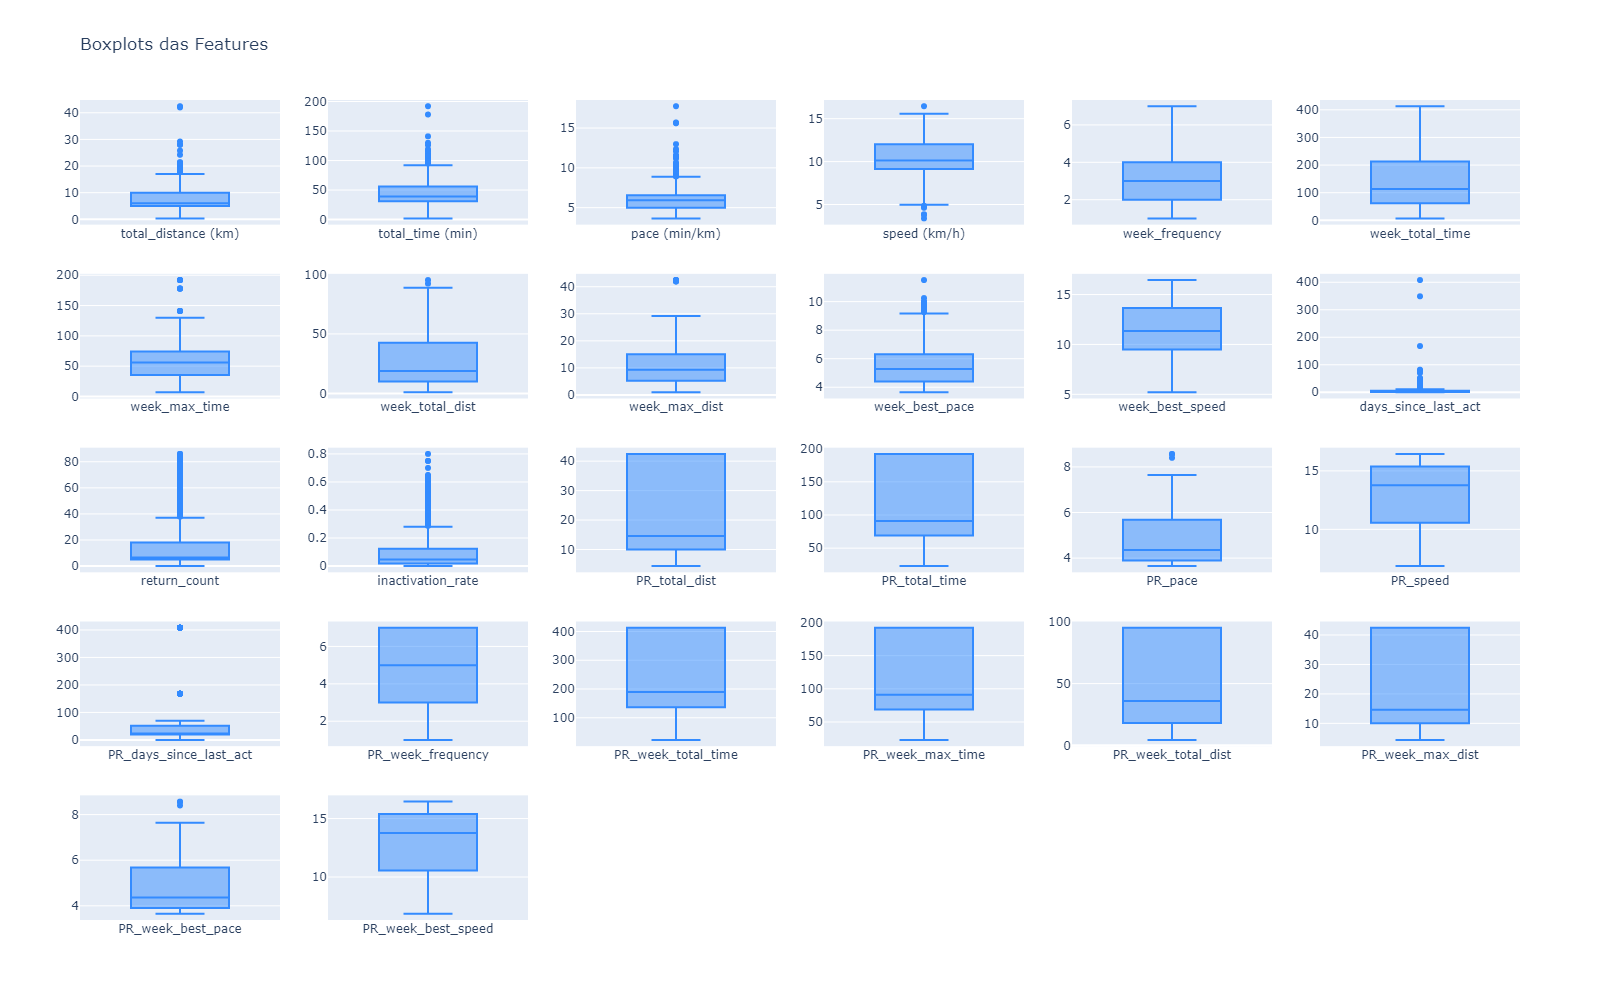

In [6]:

# Criando a figura com 6 colunas e 5 linhas
fig = sp.make_subplots(rows=5, cols=6)

# Adicionando o boxplot de cada feature ao subplot correspondente
for i, feature in enumerate(features, start=1):
    row = (i - 1) // 6 + 1
    col = (i - 1) % 6 + 1
    
    # Criando o boxplot para cada feature
    box = go.Box(y=df_athletes_activities_features[feature], name=feature, marker_color= '#338bff')
    
    fig.add_trace(box, row=row, col=col)

# Ajustando o layout
fig.update_layout(height=1000, width=1600, title_text="Boxplots das Features", showlegend=False)

# Mostrando a figura
fig.show('png')

#### Mapa de calor da matriz de correlação (Com método spearman pois as features não apresentam Distribuição Normal)

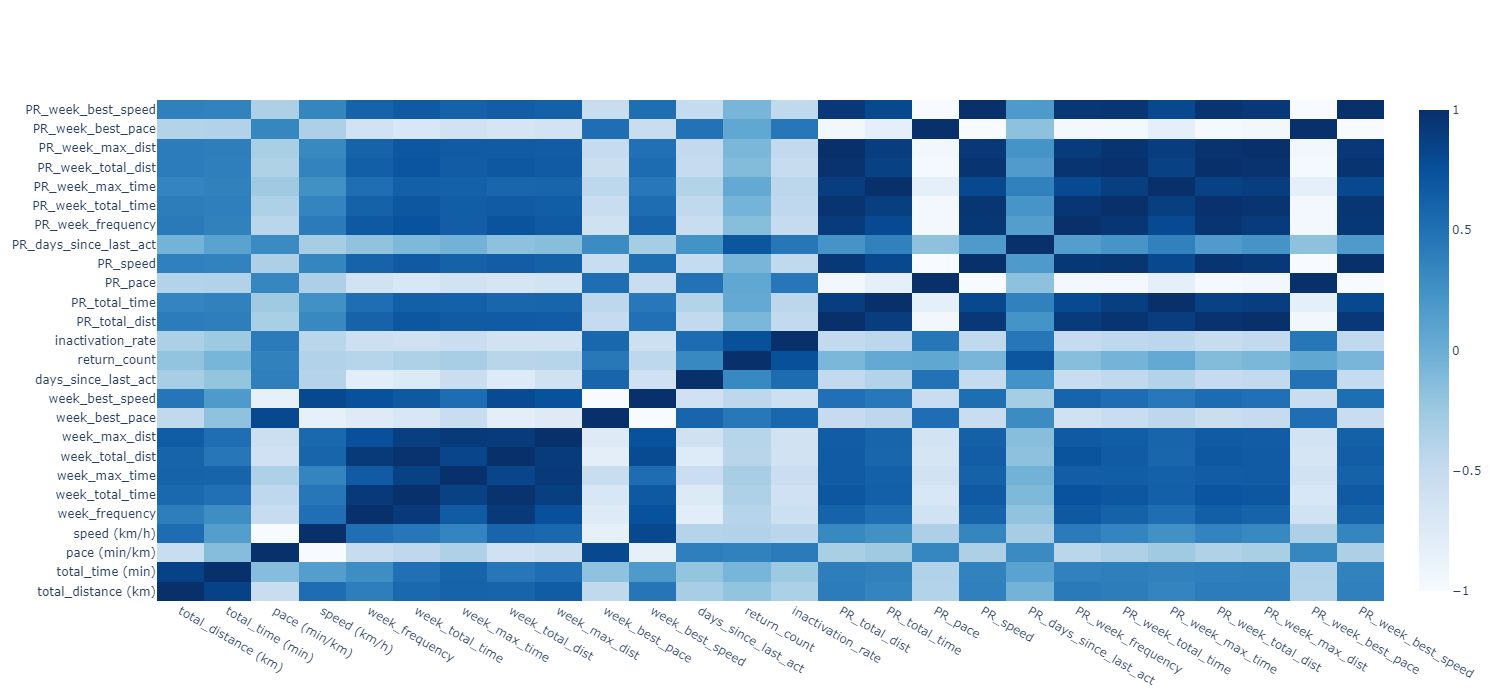

In [7]:
# Análise de correlação das variáveis
corr = df_athletes_activities_features.corr(method='spearman')

# Create heatmap
heatmap = go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.columns,
    colorscale='Blues',
    zmin=-1, 
    zmax=1
)

# Create figure and add trace
fig = go.Figure(data=heatmap)

# Update layout
fig.update_layout(
    xaxis_nticks=36,  # Ajusta o número de ticks no eixo x para melhor visualização
    yaxis_nticks=36,  # Ajusta o número de ticks no eixo y para melhor visualização
    width=1500,  # Ajusta a largura da figura
    height=700,  # Ajusta a altura da figura
    autosize=False
)

# Display the figure
fig.show('png')

#### Análise das features com coeficiente de correlação acima de 0.7 para serem removidas na etapa de modelagem

In [8]:
# Transformar a matriz de correlação em um DataFrame (formatado de maneira que seja fácil visualizar pares de features)
df_corr = pd.melt(corr, ignore_index=False, var_name='feature2', value_name='correlation')

# Resetar o índice para que 'feature1' seja uma coluna em vez de índice e renomear a coluna de índice para 'feature1'
df_corr = df_corr.reset_index().rename(columns={'index': 'feature1'})

# Remover linhas onde 'feature1' e 'feature2' são iguais (ou seja, a correlação de uma feature com ela mesma)
df_corr.drop(df_corr[(df_corr['feature1'] == df_corr['feature2'])].index, axis=0, inplace=True)

# Remover duplicatas na coluna de correlação, mantendo apenas a primeira ocorrência
df_corr.drop_duplicates(subset='correlation', inplace=True)

# Resetar o índice mais uma vez após remover duplicatas
df_corr.reset_index(drop=True, inplace=True)

# Selecionando apenas correlações com valor acima de -0.7 ou 0.7 (Forte correlação)
df_strong_corr = df_corr[(np.abs(df_corr['correlation']) > 0.7)]

df_strong_corr

,feature1,feature2,correlation
0,total_time (min),total_distance (km),0.859980
41,speed (km/h),pace (min/km),-0.999630
47,week_best_pace,pace (min/km),0.821850
48,week_best_speed,pace (min/km),-0.821758
65,week_best_pace,speed (km/h),-0.821502
66,week_best_speed,speed (km/h),0.821826
78,week_total_time,week_frequency,0.920848
80,week_total_dist,week_frequency,0.928347
81,week_max_dist,week_frequency,0.755104
82,week_best_pace,week_frequency,-0.746167


#### Análise da proporção de valores de cada classe na variável-alvo

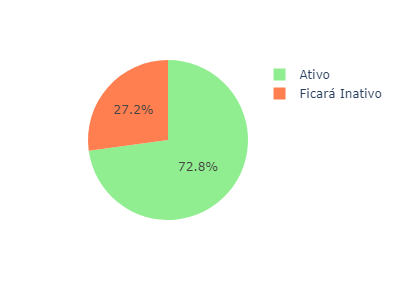

In [9]:
fig = px.pie(values=df_athletes_activities['inactivation'].value_counts(), names=["Ativo", "Ficará Inativo"], width=400, height=300, 
             color_discrete_sequence=["lightgreen","coral"])
fig.show('png')